In [17]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('../data/hmnist_28_28_RGB.csv')
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [19]:
fractions=np.array([0.8,0.2])

df=df.sample(frac=1)

train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [20]:
print(len(train_set))

8012


In [21]:
print(len(test_set))

2003


In [22]:
df.label.unique()

array([4, 0, 2, 6, 1, 3, 5])

In [23]:
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         
    1:('bcc' , 'basal cell carcinoma'),
         
    2:('bkl', 'benign keratosis-like lesions'),
         
    3:('df', 'dermatofibroma'),
         
    4:('nv', ' melanocytic nevi'),
         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),
         
    6:('mel', 'melanoma'),
}

In [24]:
y_train=train_set['label']

x_train=train_set.drop(columns=['label'])

y_test=test_set['label']

x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [30]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)


cpu


<Axes: ylabel='count'>

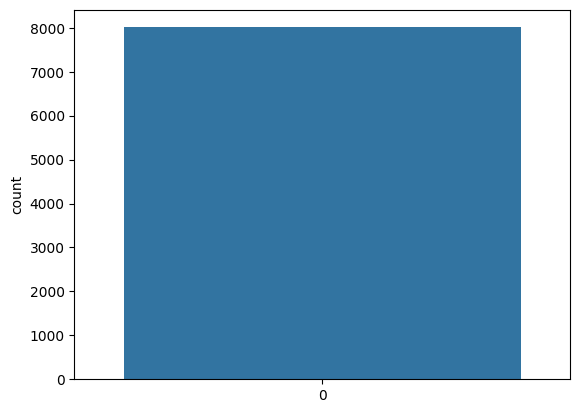

In [31]:
import seaborn as sns

sns.countplot(train_set['label'])